In [9]:
import pandas as pd
import numpy as np
from pickle import dump
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Cleaning Data

In [2]:
df=pd.read_csv('Penguin.csv')

In [3]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,3750,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3,20.6,190,3650,MALE


In [7]:
df.shape

(333, 5)

In [8]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)'],
      dtype='object')

In [5]:
df.drop(columns=['Island','Sex'],inplace=True)

In [6]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181,3750
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186,3800
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195,3250
3,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193,3450
4,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190,3650


## Basic Visualization

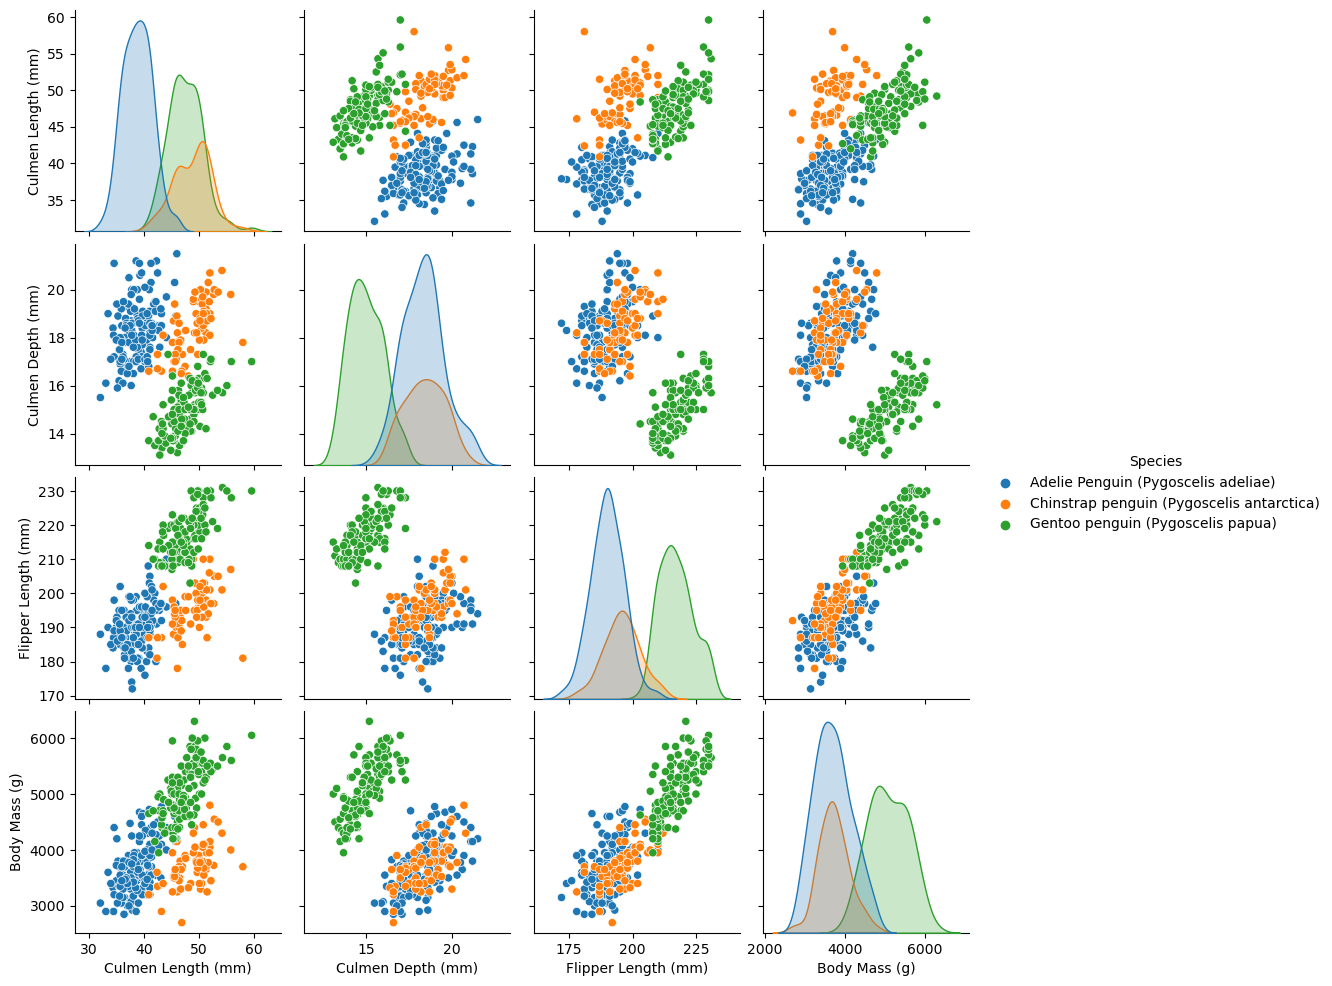

In [10]:
sns.pairplot(df,hue='Species')

In [11]:
X = df.drop('Species',axis=1)
y = df['Species']

In [12]:
X.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181,3750
1,39.5,17.4,186,3800
2,40.3,18.0,195,3250
3,36.7,19.3,193,3450
4,39.3,20.6,190,3650


## Train - Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Data Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

In [15]:
X_train_rescaled.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
237,0.336503,-0.662106,0.960846,1.005596
190,1.195380,0.379439,-0.423057,-0.729908
268,0.093777,-0.860496,1.325031,1.005596
248,0.728599,-0.414119,1.325031,1.447360
158,0.467202,0.081854,-1.224264,-0.698353


In [16]:
scaler.var_, scaler.scale_

(array([2.86849573e+01, 4.06520620e+00, 1.88493315e+02, 6.27702995e+05]),
 array([  5.35583395,   2.01623565,  13.72928676, 792.27709493]))

## Scaling Test Data

In [17]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                              columns = X_test.columns,
                              index = X_test.index)

In [18]:
X_test_rescaled.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
56,-1.287894,-0.066938,-1.224264,-0.824572
54,-1.642647,-0.116535,-1.224264,-1.392555
276,1.830202,-0.711704,2.126238,1.762907
101,-1.175866,1.420984,-0.860079,-0.445917
59,-0.541044,0.429036,-0.714405,-0.382807


## Training different models

### 1. KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_rescaled, y_train)

KNeighborsClassifier()

In [20]:
y_test_pred = knn_classifier.predict(X_test_rescaled)

In [21]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9701492537313433

### 2. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_rescaled,y_train)

LogisticRegression()

In [32]:
y_test_pred = lr_classifier.predict(X_test_rescaled)

In [33]:
# Calculate accuracy 
metrics.accuracy_score(y_test,y_test_pred)

0.9701492537313433

### 3. Naive Bayes 

In [28]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_rescaled,y_train)

GaussianNB()

In [29]:
y_test_pred = nb_classifier.predict(X_test_rescaled)

In [30]:
# Calculate metrics
metrics.accuracy_score(y_test,y_test_pred)

0.9701492537313433

### 4. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_rescaled,y_train)

DecisionTreeClassifier()

In [36]:
y_test_pred = dt_classifier.predict(X_test_rescaled)

In [37]:
# Claculate metrics
metrics.accuracy_score(y_test,y_test_pred)

0.9701492537313433

### 5. Support Vector Machine

In [38]:
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train_rescaled,y_train)

SVC()

In [39]:
y_test_pred = sv_classifier.predict(X_test_rescaled)

In [40]:
# Calculate metrics
metrics.accuracy_score(y_test,y_test_pred)

0.9701492537313433

## Serializing the Models

In [42]:
dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(knn_classifier, open('models/knn_model.pkl', 'wb'))
dump(lr_classifier, open('models/lr_model.pkl', 'wb'))
dump(nb_classifier, open('models/nb_model.pkl', 'wb'))
dump(dt_classifier, open('models/dt_model.pkl', 'wb'))
dump(sv_classifier, open('models/sv_model.pkl', 'wb'))